# 8.1. О чём этот модуль

В этом модуле мы рассмотрим следующие темы:

- Задача анализа временных рядов.
- Визуализация временных рядов.
- Способы визуализации в python.
- Предобработка данных.
- Интерполяция.
- Увеличение/уменьшение разрешения (upsampling/downsampling).
- Оконные функции.
- Сглаживание.
- Цифровые фильтры и способы разложения сигнала
- Фильтры низких частот.
- Высокочастотные и полосные фильтры.
- Выделение признаков. TSFresh.
- Выделение признаков NNMF.
- Особенности применения машинного обучения к временным рядам.

# 8.2. Задача анализа временных рядов

## Временные ряды делятся на три типа:

- Непрерывные данные: детектор тепла непрерывно записывает измеренную температуру.
- Дискретные данные: целевая температура изменяется периодически, например, в какой-то момент времени выставили конкретную температуру. 
- События: разовое событие, либо оно произошло, либо нет. Например, открытие окна.

## Области анализа временных рядов

- Прогнозирование (товарооборот, количество авиаперелётов, цены на акции);
- Нахождение аномалий (нагрузка на мобильную сеть оператора, ЭКГ, мониторинг технологических процессов);
- Декодирование сигнала (распознавание речи, нейроинтерфейсы, определение скрытых параметров системы по сигналам с датчиков).

## Задание 8.2.1
К какому типу временных рядов относится мониторинг пульса?
- Непрерывные данные верно
- Дискретные данные
- Событийные данные

## Задание 8.2.2
К какому типу временных рядов относится ежедневный мониторинг пробуждения человека?
- Непрерывные данные
- Дискретные данные
- Событийные данные верно

## Задание 8.2.3
К какому типу задач относится задача на обнаружение вспышек в данных по интенсивности излучения Солнца?
- Прогнозирование
- Нахождение аномалий верно
- Декодирование сигнала

# 8.3. Визуализация временных рядов

Наиболее популярные библиотеки Python для визуализации данных, которые могут использоваться и для визуализации временных рядов:

- Встроенные методы визуализации pandas
- Для большего контроля — matplotlib
- Для большей красоты и для специфических графиков — seaborn
- Для интерактивности — plotly

Перед визуализацией нужно убедиться, что временной ряд отсортирован по времени. 
В этом примере мы создаём 360 случайных точек. Для каждой точки строим синус и визуализируем результат.

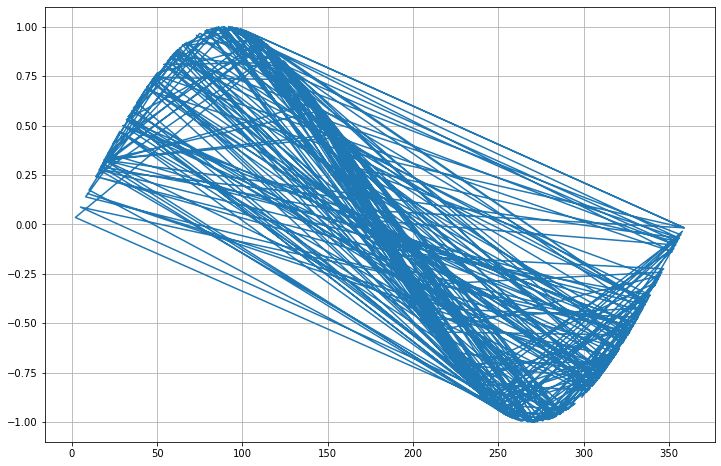

In [7]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

N = 360
df = pd.DataFrame()
## создаём 360 случайных точек для оси времени
df['t'] = np.random.randint(low=1, high=N, size=N)
## строим синус на этих точках
df['y'] = np.sin(df.t * np.pi / 180) 
## сортируем (или не сортируем) ряд по времени
#df = df.sort_values(by='t')

## визуализируем
f, ax = plt.subplots(figsize=(12,8))
ax.plot(df.t, df.y)
ax.grid()
plt.show()

## Лайфхак

Если по каким-то причинам не хочется сортировать ряд по времени, то можно применить метод scatter(), вместо plot(). В этом случае график будет иметь правильный вид, несмотря на то, что последовательность точек не упорядочена во времени. Это связано с тем что метод scatter() по умолчанию просто ставит точки, не соединяя их линями. 

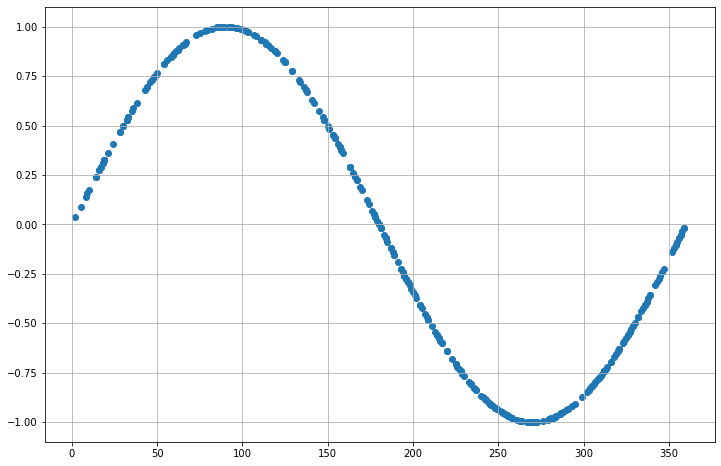

In [8]:
f, ax = plt.subplots(figsize=(12,8))
ax.scatter(df.t, df.y)
ax.grid()
plt.show()

## Временная ось

Основное отличие в визуализации временных рядов от визуализации других данных — значения на временной оси часто задаются не порядковым номером, а датой или временем (timestamp).

В примере мы создаем ось времени с начальной датой 01.09.2019. Всего создаем 365 дат с частотой 1 день. И для каждой точки строим синус.

,t,y
0,2019-09-01,0.000000
1,2019-09-02,0.017452


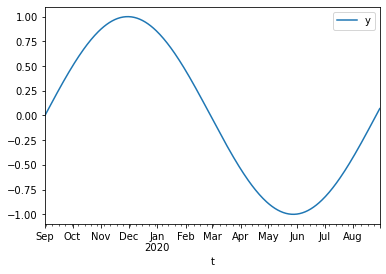

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df = pd.DataFrame()
df['t'] = pd.date_range(start='2019-09-01', periods=365, freq='D')
df['y'] = np.sin(df.index * np.pi / 180)
df.plot('t', 'y')
df.head(2)

## Задание 8.3.1
Какую функцию стоит применить для визуализации неотсортированного по времени ряда:
- plt.scatter() верно
- sns.distplot()
- plt.plot()
- plt.barplot()

# 8.4. Способы визуализации в Python

## Встроенный в pandas метод plot

Pandas позволяет строить различные виды графиков и чартов. При быстрой разработке подходит встроенный метод pandas.plot:

&lt;AxesSubplot:xlabel=&#39;t&#39;&gt;

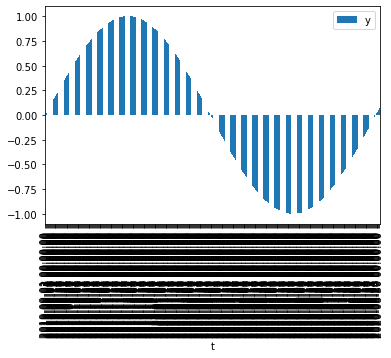

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame()
## создаём 365 дат с частотой в 1 день, начиная с 1 сентября 2019
df['t'] = pd.date_range(start= '2019-09-01 ', periods=365, freq= 'D')
## строим синус, используя индекс таймфрейма
df['y'] = np.sin(df.index * np.pi / 180)
## визуализируем при помощи pandas
df.plot(x='t', y='y', kind='bar')

## matplotlib

При помощи matplotlib можно кастомизировать графики, добавляя все необходимые элементы (подписывать оси, менять размеры шрифтов, добавлять текст и стрелки, строить график в графике и прочее).

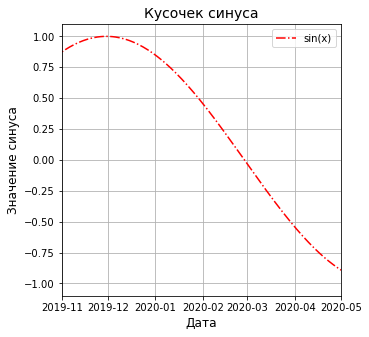

In [24]:
f = plt.figure(figsize=(5, 5))
plt.plot(df.t, df.y, 'r-.')  #ls='-.', с='r')
plt.xlim(['2019-11-01', '2020-05'])
plt.legend(['sin(x)'])
plt.title('Кусочек синуса', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Значение синуса', fontsize=12)
plt.grid()
# in 201ms, finished 20:35:37 2019-08-10

## Лайфхак

Вместо прямого обращения к методу plt можно создать оси (ax) и обращаться к ним. Этот метод более предпочтителен, он дает больше контроля над графиком. Также он позволяет нарисовать несколько графиков рядом друг с другом. 

Обращение к осям

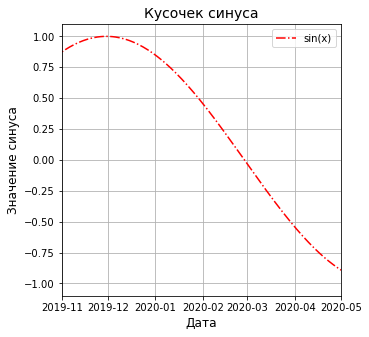

In [28]:
f, ax = plt.subplots(figsize=(5, 5))                                
ax.plot(df.t, df.y, 'r-.') # ls='-.', с='r')                              
ax.set_xlim(['2019-11-01', '2020-05'])                              
ax.legend(['sin(x)'])                                              
ax.set_title('Кусочек синуса', fontsize=14)                         
ax.set_xlabel('Дата', fontsize=12)                                  
ax.set_ylabel('Значение синуса', fontsize=12)                     
ax.grid()                                                           
#executed in 202ms, finished 21:04:51 2019-08-10 

Обратите внимание на разное название методов (приставка set_) при обращении через оси и через plt.

## Пример двух графиков

В функции plt.subplots() указано расположение графиков (1 строка, 2 столбца). Оси координат ax являются листом, к элементам которого обращаемся для построения первого и второго графиков. 

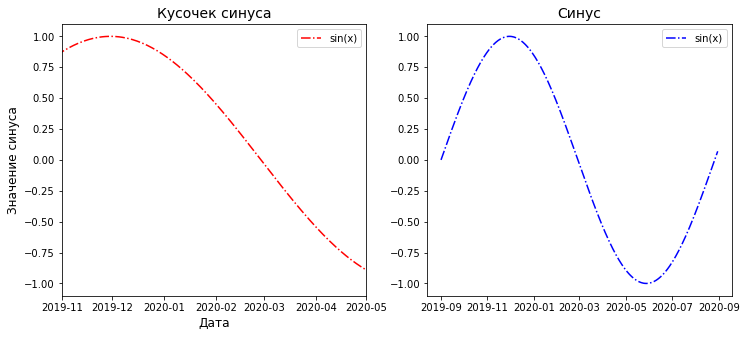

In [31]:
f, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(df.t, df.y, 'r-.') # ls='-.', с='r')
ax[0].set_xlim(['2019-11-01', '2020-05'])
ax[0].legend(['sin(x)'])
ax[0].set_title('Кусочек синуса', fontsize=14)
ax[0].set_xlabel('Дата', fontsize=12)
ax[0].set_ylabel('Значение синуса', fontsize=12)
ax[0].grid()

ax[1].plot(df.t, df.y, 'b-.') # ls='-.', с='r')
ax[1].legend(['sin(x)'])
ax[1].set_title('Cинус', fontsize=14)
ax[0].grid()
#executed in 418ms, finished 21:15:55 2019-08-10

## Глобальные настройки
Со стандартными настройками текст на графиках получается слишком мелким.

Чтобы на каждом графике не писать вручную fontsize=..., применяются глобальные настройки графиков. Делается это при помощи обращения  plt.rcParams:

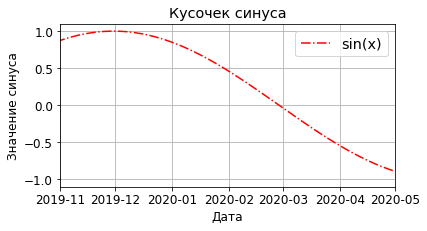

In [34]:
## глобальные настройки графиков
plt.rcParams['figure.figsize'] = [6.0, 3.0]
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'

f, ax = plt.subplots()                                
ax.plot(df.t, df.y, 'r-.') # ls='-.', с='r')                           
ax.set_xlim(['2019-11-01', '2020-05'])                              
ax.legend(['sin(x)'])                                              
ax.set_title('Кусочек синуса')                         
ax.set_xlabel('Дата')                                  
ax.set_ylabel('Значение синуса')                     
ax.grid()                                                           
#executed in 185ms, finished 21:59:46 2019-08-10 

## Визуализация при помощи seaborn

В seaborn более эстетический вид графиков, чем в matplotlib.

seaborn позволяет легко делать некоторые классы визуализаций, которые сложно сделать в matplotlib, например, сlustermap.

&lt;AxesSubplot:xlabel=&#39;t&#39;, ylabel=&#39;y&#39;&gt;

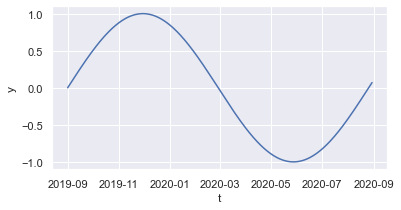

In [42]:
import seaborn as sns
sns.set() ## ставим эстетические параметры
## визуализируем при помощи seaborn
sns.lineplot(x="t", y="y", data=df)
#plt.show()

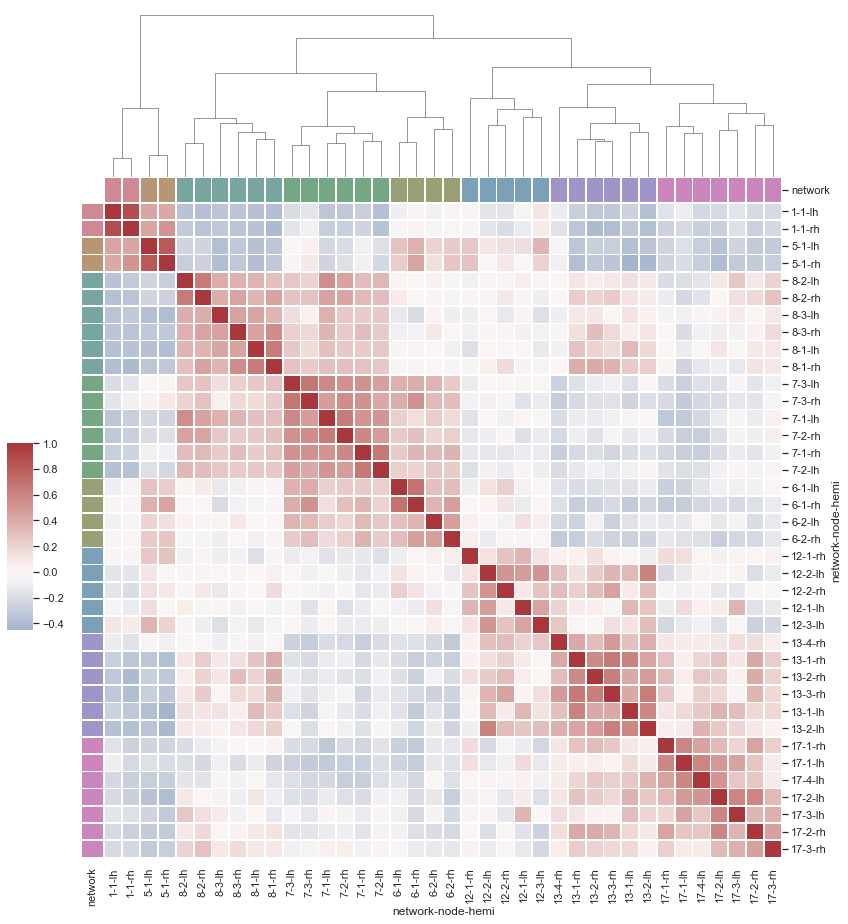

In [44]:
import pandas as pd
import seaborn as sns
#sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

## Визуализация при помощи plotly

Создание графиков при plotly более трудоёмко, но графики сразу получаются интерактивными.

In [46]:
import plotly.graph_objects as go 

df = pd.DataFrame()
## создаём 365 дат с частотой в 1 день, начиная с 1 сентября 2019
df['t'] = pd.date_range(start= '2019-09-01 ', periods=365, freq= 'D')
## строим синус, используя индекс таймфрейма
df['y'] = np.sin(df.index * np.pi / 180)

## создаём фигуру и добавляем в неё график
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.t, y=df.y, mode='lines'))
fig.show()

## Визуализация финансовых данных

Встроенный метод Plotly — Candlestick() — рисует японские свечи и автоматически добавляет ползунок под график для скроллинга.

In [69]:
import plotly.graph_objects as go
import pandas as pd

## загружаем стоимость акций apple
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
## говорим методу Candlestick какие колонки дейтафрейма использовать
data = {
    'type' : 'candlestick',
    'x' : df['Date'],
    'open' : df['AAPL.Open'],
    'high' : df['AAPL.High'],
    'low' : df['AAPL.Low'],
    'close' : df['AAPL.Close']
}
## отображаем фигуру с данными
fig = go.Figure(data)
fig.show() 

## Задание 8.4.1

Какая библиотека строит интерактивные графики по умолчанию?
- Pandas
- Plotly верно
- Matplotlib
- Seaborn

## Задание 8.4.2

        import  matplotlib.pyplot  as  plt
        f, ax = plt.subplots(figsize=(14, 7))

Какой метод даёт больше контроля при рисовании графика:

- Построение графика при помощи методов plt
- Построение графика при помощи методов ax верно

# 8.5. Предобработка данных

## Предобработка данных
В большинстве случаев до анализа временных рядов нужно сначала выполнить предобработку данных, то есть:

- Избавиться от пропущенных значений (интерполяция)
- Привести к фиксированной временной сетке (интерполяция, up-/downsampling)
- Изменить временное разрешение (up-/downsampling) 

### Проверка качества данных включает:

- Размер DataFrame
- Количество интересующих нас уникальных элементов
- Количество пропущенных / отсутствующих данных
- Основные статистические характеристики данных
- Быстрая визуализация того, что можно визуализировать

## Задание 8.5.1

Привести данные к фиксированной временной сетке можно при помощи:
- Интерполяции верно
- Экстраполяции
- Триангуляции

# 8.6. Практика

In [79]:
import missingno as msno
%matplotlib inline
#msno.matrix(df)
#msno.bar(df)
#msno.heatmap(df) #Корреляция пропусков

In [80]:
df = pd.read_csv('srt_data.csv')
df.head()

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
0,2018-10-01,VA4202760704,165132,2787.1310,1953.0737,575.49180
1,2018-10-02,VA4202760704,165132,2786.1047,1901.0000,550.63710
2,2018-10-03,VA4202760704,165132,2784.6934,1878.0369,550.09204
3,2018-10-04,VA4202760704,165132,2773.3500,1976.9114,583.65820
4,2018-10-05,VA4202760704,165132,2776.4314,2041.4010,589.74110


In [87]:
print(f'df.ts.min() = {df.ts.min()}')
print(f'df.ts.max() = {df.ts.max()}')

df.ts.min() = 2018-10-01
df.ts.max() = 2019-04-30


In [86]:
df.isna().sum()

ts                         0
serialNo                   0
home                       0
batteryVoltageMilliV       3
insideTemperatureCentiC    2
humidityMilliPerc          0
dtype: int64

## Задание 8.6.1
Выберите данные с датчика с серийным номером VA2170620672.
Укажите максимальное значение напряжения на батарее (batteryVoltageMilliV).

In [89]:
df.head(1)

,ts,serialNo,home,batteryVoltageMilliV,insideTemperatureCentiC,humidityMilliPerc
0,2018-10-01,VA4202760704,165132,2787.131,1953.0737,575.4918


In [91]:
df[df.serialNo == 'VA2170620672']['batteryVoltageMilliV'].max()

3219.567

## Задание 8.6.2

Для того же датчика укажите значение напряжения на батарее, соответствующее 75% квантиля распределения.

In [92]:
df[df.serialNo == 'VA2170620672']['batteryVoltageMilliV'].quantile(0.75)

2951.2801

## Задание 8.6.3

Для того же датчика выберите данные за ноябрь 2018 г. и укажите медианное значение на влажности (humidityMilliPerc).

In [130]:
df['data_y'] = df.ts.apply(lambda x: int(x.split('-')[0]))
df['data_m'] = df.ts.apply(lambda x: int(x.split('-')[1]))
df['data_d'] = df.ts.apply(lambda x: int(x.split('-')[2]))

In [138]:
df[(df.serialNo == 'VA2170620672')&(df.data_y == 2018)&(df.data_m == 11)]['humidityMilliPerc'].median()

566.3562

## Задание 8.6.4

Выберите данные с датчика с серийным номером VA2048854528.

Постройте график напряжения на батарее (batteryVoltageMilliV).

Укажите, сколько раз батарея была заменена (количество пиков со значением выше  mV).

&lt;AxesSubplot:&gt;

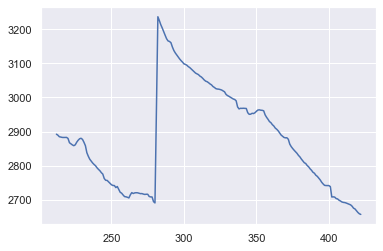

In [142]:
df[(df.serialNo == 'VA2048854528')]['batteryVoltageMilliV'].plot()

## Задание 8.6.5

Укажите, сколько значений температуры (среди всех данных) лежат строго ниже 1200 сС ( 12 градусов Цельсия).

In [149]:
df[df.insideTemperatureCentiC < 1200].shape[0]

92

## Задание 8.6.6

Укажите, сколько значений температуры (среди всех данных) лежат нестрого выше 75%-квантиля, вычисленного по всем датчикам.

In [150]:
df[df.insideTemperatureCentiC >= df.insideTemperatureCentiC.quantile(0.75)].shape[0]

1206

# 8.7. Интерполяция
Интерполяция — способ нахождения промежуточных значений величины по имеющемуся дискретному набору известных значений.

Основные способы интерполяции:

- Метод ближайшего соседа
- Интерполяция многочленами:
    - Линейная интерполяция
    - Интерполяция сплайнами

В pandas эти реализуются методом interpolate() с различными параметрами.

## Задание 8.7.1
Интерполяция — это:
- особый тип аппроксимации, при котором функция аппроксимируется вне заданного интервала, а не между заданными значениями
- способ нахождения промежуточных значений величины по имеющемуся дискретному набору известных значений верно
- один из методов определения взаимного положения точек для построения неравномерных сетей

## Задание 8.7.2

Каким методом обычно заполняются пропущенные значения при работе с дискретными временными рядами (например, выставленная спортсменом скорость движения беговой дорожки):
- Линейная интерполяция
- Квадратичная интерполяция
- Метод заполнения вперёд (forward fill) верно
- Метод заполнения назад (backward fill)
- Метод ближайшего соседа (nearest)

## Задание 8.7.3
Линейная интерполяция — это:
- Применение обычной интерполяции сначала в направлении одной из координат, а затем в перпендикулярном направлении
- Триангуляция прямой линией известного отрезка данных
- Аппроксимация функции отрезком прямой линии верно

# 8.8. Практика

In [151]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

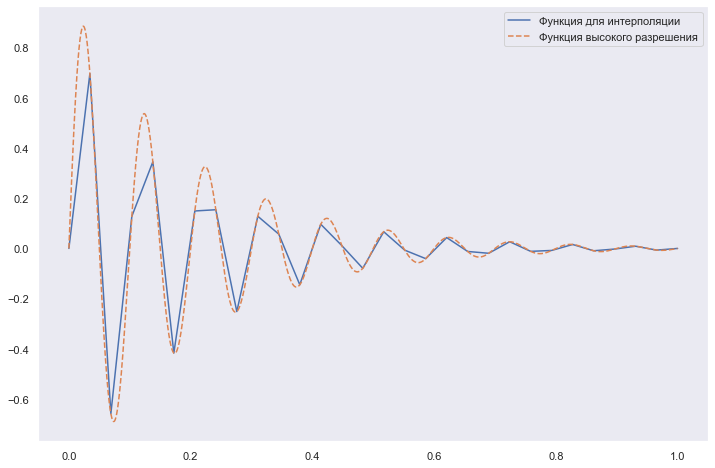

In [152]:
# Используйте этот код для решения заданий.
w1 = 10    
a1 = 1     
Fs = 30 
Ts = 1.0/Fs
alpha = 5

## исходная ось (низкое разрешение)
t = np.linspace(0, 1, Fs)
## функция для интерполяции
y = a1*np.exp(-alpha*t) * np.sin(2*np.pi*w1*t) 
 

## интерполяционная сетка (высокое разрешение)
tt = np.linspace(0, 1, 100*Fs)
## функция высокого разрешения (пытаемся получить её интерполяцией)
y_high_res = a1*np.exp(-alpha*tt) * np.sin(2*np.pi*w1*tt) 

f, ax = plt.subplots(figsize=(12, 8))
ax.plot(t, y)
ax.plot(tt, y_high_res, '--')
ax.legend(['Функция для интерполяции', 'Функция высокого разрешения'])
ax.grid()
plt.show()

В следующих заданиях требуется проинтерполировать временной ряд.

## Задание 8.8.1
Проинтерполируйте функцию "y" на сетке "tt" кубическим сплайном, используйте для этого 
        
        interpolate.interp1d

Укажите среднее квадратическое отклонение интерполированной функции от функции высокого разрешения y_high_res по формуле 

$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 $$

, округлите до 5 знака после точки.

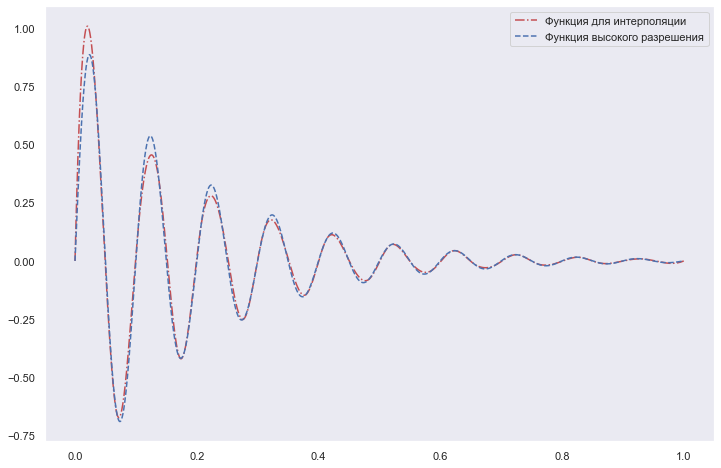

In [169]:
# Используйте этот код для решения заданий.
w1 = 10    
a1 = 1     
Fs = 30 
Ts = 1.0/Fs
alpha = 5

## исходная ось (низкое разрешение)
t = np.linspace(0, 1, Fs)
## интерполяционная сетка (высокое разрешение)
tt = np.linspace(0, 1, 100*Fs)

## функция для интерполяции
y = a1*np.exp(-alpha*t) * np.sin(2*np.pi*w1*t)

## интерполяция
f_interpolat =  interpolate.interp1d(t, y, kind = 'cubic')

x_new = tt
y_new = f_interpolat(x_new)

## функция высокого разрешения (пытаемся получить её интерполяцией)
y_high_res = a1*np.exp(-alpha*tt) * np.sin(2*np.pi*w1*tt) 

f, ax = plt.subplots(figsize=(12, 8))
ax.plot(x_new, y_new, 'r-.')
ax.plot(tt, y_high_res, 'b--')
ax.legend(['Функция для интерполяции', 'Функция высокого разрешения'])
ax.grid()
plt.show()

In [171]:
from sklearn.metrics import mean_squared_error
round(mean_squared_error(y_high_res, y_new),5)

0.00105

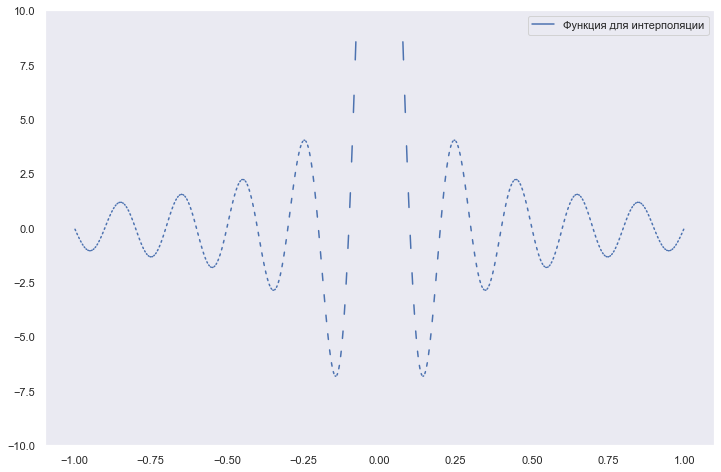

In [173]:
# для последующих задач использовать данный код
w1 = 5   
a1 = 1     
Fs = 1000
Ts = 1.0/Fs
alpha = 5

df = pd.DataFrame()
## ось
df['t'] = np.linspace(-1, 1, Fs)
## функция для интерполяции
df['y'] = np.sin(2*np.pi*w1*df.t) / df.t 
 
## пропущенные значения    
df['y_lost'] = df.y
df.loc[0::3, 'y_lost'] = np.nan


f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y_lost)
ax.set_ylim([-10, 10])
ax.legend(['Функция для интерполяции'])
ax.grid()
plt.show()

#df.head(10)

## Задание 8.8.2

Проинтерполируйте пропущенные значения функции y_lost, используя метод interpolate с параметром nearest из пакета pandas. Укажите среднее квадратическое отклонение интерполированной функции от исходной функции "y", округлите до 3 знака после точки.

In [176]:
df.head(1)

,t,y,y_lost
0,-1.0,-1.224647e-15,NaN


In [177]:
## интерполяция
df['y_inter'] = df['y_lost'].interpolate(method='nearest')

In [179]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   t        1000 non-null   float64
 1   y        1000 non-null   float64
 2   y_lost   666 non-null    float64
 3   y_inter  998 non-null    float64
dtypes: float64(4)
memory usage: 31.4 KB


In [182]:
round(mean_squared_error(df['y'], df['y_inter'].fillna(0)),3)

0.021

## Задание 8.8.3

Проинтерполируйте пропущенные значения функции y_lost, используя метод interpolate с параметром polynomial, order = 5 из пакета pandas. Укажите среднее квадратическое отклонение интерполированной функции от исходной функции "y" , округлите до 5 знака после точки.

In [183]:
## интерполяция
df['y_inter_2'] = df['y_lost'].interpolate(method='polynomial', order = 5)

In [185]:
round(mean_squared_error(df['y'], df['y_inter_2'].fillna(0)),5)

0.0

# 8.9. Увеличение/уменьшение разрешения (upsampling/downsampling)

## Необходимость изменения разрешения данных

Иногда разрешение имеющихся данных не соответствует задаче. В этом случае нужно понизить или повысить разрешение данных.

Например, когда необходимо построить прогноз цены акции по дням на всю следующую неделю. При этом у вас есть цена акции на каждую минуту. В этом случае вам не нужно работать с таким разрешением. Сначала необходимо понизить разрешение данных до часового (1 точку каждый час) или дневного (1 точку каждый день) и уже с полученными данными работать. Это задача понижения разрешения — downsampling.

Или наоборот, вам необходимо знать значение переменной более часто, чем оно у вас есть. Например, у вас есть данные по цене акции на каждый час, а вы хотите иметь данные на каждую минуту. Вы не можете просто повысить разрешение и получить эти данные. Но можете построить недостающие данные с помощью интерполяции — upsampling.

Задача повышения разрешения (upsampling) решается методом интерполяции данных и обычно связана с данными, заданными на нерегулярной сетке.

## Задание 8.9.1

Для чего, в частности, требуется уменьшение разрешения данных:
- При сильно зашумлённых данных, для сглаживания верно
- При слишком высоком качестве данных
- Для интерполяции данных

## Задание 8.9.2

Каким методом пакета pandas делается изменение разрешения:
- resolution()
- subsample()
- upsample()
- resample() верно
- sample()
- apply()
- conversion()

# 8.10. Практика

## Используйте этот код для решения заданий

In [187]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime

In [197]:
filePath = 'EURUSD_1.csv'
data = pd.read_csv(filePath)
data['ts'] = pd.to_datetime(data.ts)
print(f'data.shape = {data.shape}')

data.head()

data.shape = (121674, 6)


,open,high,low,close,vol,ts
0,1.05135,1.05192,1.05134,1.05187,65,2017-01-02 09:00:00
1,1.05185,1.05198,1.05153,1.05168,58,2017-01-02 09:01:00
2,1.05175,1.05201,1.05149,1.05154,33,2017-01-02 09:02:00
3,1.05177,1.05202,1.05177,1.05200,20,2017-01-02 09:03:00
4,1.05202,1.05202,1.05198,1.05202,7,2017-01-02 09:04:00


In [217]:
df = data.copy()
df = df[df.ts <= '2017-01-03']

fig = go.Figure(data  = [go.Candlestick(
            x     = df['ts'],
            open  = df['open'],
            high  = df['high'],
            low   = df['low'],
            close = df['close']
        )])

fig.show()

## В следующих заданиях требуется изменить разрешение временного ряда.

## Задания 8.10.1 - 8.10.5
Понизьте разрешение ряда с 1 минуты до 8 часов. Результат округлите до пятого знака после запятой.

1. Аггрегируйте цену open, взяв её медиану.
Укажите результирующую цену open в момент времени 2017-01-02 16:00:00
 
2. Аггрегируйте цену close, взяв её среднее значение.
Укажите результирующую цену сlose в момент времени 2017-01-02 16:00:00
 
3. Аггрегируйте цену high, взяв её максимальное значение.
Укажите результирующую цену high в момент времени 2017-01-04 00:00:00
 
4. Аггрегируйте цену low, взяв её минимальное значение.
Укажите результирующую цену low в момент времени 2017-01-04 00:00:00
 
5. Аггрегируйте объём сделок vol, взяв половину от суммы его медианного и среднего значений.
Округлите значения до первого знака после запятой. Укажите результирующий объём в момент времени 2017-01-05 08:00:00


In [225]:
## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
        return round((value.median() + value.mean())/2,1)

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'median', ## для цены открытия берём первое значение 
    'close':  'mean',  ## для цены закрытия - cреднее
    'vol'  :   myFunc,   ## суммируем объёмы сделок в этот час
    'high' :  'max',   ## берём максимум пикового значения
    'low'  :  'min'   ## можно определить свою функцию аггрегации для наименьшого значения
}

df = data.copy()
#df = df[df.ts <= '2017-01-03']

## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
downsampled = df.resample('8H').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

In [233]:
downsampled[downsampled.ts =='2017-01-02 16:00:00'][['ts','open', 'close']]

,ts,open,close
1,2017-01-02 16:00:00,1.04649,1.046375


In [234]:
downsampled[downsampled.ts =='2017-01-04 00:00:00'][['ts','high', 'low']]

,ts,high,low
5,2017-01-04,1.04236,1.03898


In [235]:
downsampled[downsampled.ts =='2017-01-05 08:00:00'][['vol']]

,vol
9,481.3


## Задания 8.10.6 - 8.10.8

Отфильтруйте ряд, оставив в нём лишь цены до 2017-01-03 включительно.

Используя те же аггрегирующие функции, при помощи функции resample повысьте разрешение отфильтрованного ряда до 10 секунд.

6. Укажите количество отсутствующих данных в колонке open.

 
7. Используя метод pandas.Series.interpolate, линейно проинтерполируйте колонку цен открытия - open.
Укажите значение цены открытия в момент времени 2017-01-02 09:00:40, результат округлите до шестого знака после запятой.
 
8. Аналогично проинтерполируйте колонку цен закрытия - close. В качестве метода интерполяции используйте nearest.
Укажите значение цены закрытия в момент времени 2017-01-02 09:00:40. Результат округлите до пятого знака после запятой.

In [245]:
df = data.copy()
df = df[df.ts <= '2017-01-03']

In [246]:
df.shape

(893, 6)

In [248]:
## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
upsampled = df.resample('10S').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
upsampled = upsampled.reset_index()

In [249]:
upsampled.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 5401 entries, 0 to 5400
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ts      5401 non-null   datetime64[ns]
 1   open    893 non-null    float64       
 2   close   893 non-null    float64       
 3   vol     893 non-null    float64       
 4   high    893 non-null    float64       
 5   low     893 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 253.3 KB


In [240]:
#df['unixtime'] = (df['ts'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')